<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana María Aguilera Gómez y José Antonio Contreras Peña.

**Fecha:** 21 de septiembre del 2021.

**Expediente** : 720567 y 721860.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/anamaria1404/SPF_Tareas3y4

# Tarea 4: Clase 7

### Ejercicio 1: 
Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st

Código de solución estudiante 1

Probab. suma=7 : 14.74285714285714 %
Probab. suma=14 : 4.137142857142857 %
Probab. suma=18 : 0.022857142857142857 %


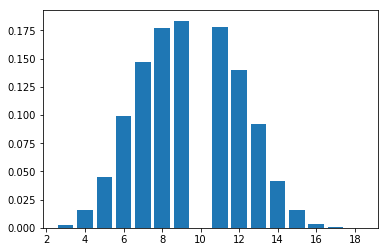

In [2]:
# Código de solución estudiante 1
N = 10**4
r = pd.DataFrame(((np.random.randint(1,7)) + (st.binom(n=5, p=0.5).rvs()) + (st.binom(n=5, p=0.2).rvs())) for i in range(N))

prob, s = np.histogram(r, bins=16, density=True)
plt.bar(range(3,19), prob)

print('Probab. suma=7 :', prob[4]*100, '%')
print('Probab. suma=14 :', prob[11]*100, '%')
print('Probab. suma=18 :', prob[15]*100, '%')

Código de solución estudiante 2

In [3]:
# Código de solución estudiante 2
N = 100000
d1 = np.random.randint(1, 7, size=N)
d2 = st.binom(n=5, p=0.5).rvs(size=N)+1
d3 = st.binom(n=5, p=0.2).rvs(size=N)+1
print(f'Probabilidad suma=7: {((d1+d2+d3)==7).sum()*100/N:.2f}%')
print(f'Probabilidad suma=14: {((d1+d2+d3)==14).sum()*100/N:.2f}%')
print(f'Probabilidad suma=18: {((d1+d2+d3)==18).sum()*100/N:.2f}%')
print()


Probabilidad suma=7: 12.62%
Probabilidad suma=14: 1.35%
Probabilidad suma=18: 0.00%



### Ejercicio 2 Aplicación- Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

### Objetivo
Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

### Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Todas las distrubuciones de probabilidad se supondrán uniformes.
- Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos

Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

In [4]:
################## Datos del problema
d = 5 
T = 25200 #tiempo total simulación
T_at_min = 5; T_at_max = 30 #tiempo llegada hasta ser atendido
T_mujer_min =60; T_mujer_max = 300 #tiempo en ser atendido
T_hombre_min = 40; T_hombre_max = 120 #tiempo en ser atendido
C_mujer_min = 30; C_mujer_max = 100 #consumo
C_hombre_min = 20; C_hombre_max = 80 #consumo

Código de solución estudiante 1

In [5]:
# Código de solución estudiante 1
def f(mi,ma):
    return np.random.randint(mi, ma)

dia = 0
gtm = 0
gth = 0
at = 0
ctm = 0
cth = 0

while dia <= d:
    tiempo = 0
    gm = 0
    gh = 0
    cantm = 0
    canth = 0
    atencion = 0
    
    while tiempo <= T:
        if np.random.randint(0,2) == 0:
            gm += f(C_mujer_min,C_mujer_max)
            cantm += 1
            atencion += f(T_at_min,T_at_max)
            tiempo += atencion + f(T_mujer_min,T_mujer_max)        
        elif np.random.randint(0,2) == 1:
            gh += f(C_hombre_min,C_hombre_max)
            canth += 1
            atencion += f(T_at_min,T_at_max)
            tiempo += atencion + f(T_hombre_min,T_hombre_max)               
    gtm += gm
    gth += gh
    dia += 1
    at += atencion
    ctm += cantm
    cth += canth

gth, gtm, ctm, cth, at

(4546, 12323, 191, 92, 4666)

In [6]:
print('Gastos en 5 días: $', gth+gtm, '; Hombres: $',gth, ', Mujeres $',gtm)
print('Consumo promedio diario: $',(gth+gtm)/(ctm+cth), '; Hombres: $',gth/cth, ', Mujeres: $',gtm/ctm)
print('Cantidad de personas atendidas por día:',round((ctm+cth)/d), 'en promedio')
print('Tiempo de atención promedio:',at/(ctm+cth), 'segundos')
print('Ganancia promedio en 5 días y rentabilidad: $',gth+gtm, 'y $', (gtm+gtm)*0.6)

Gastos en 5 días: $ 16869 ; Hombres: $ 4546 , Mujeres $ 12323
Consumo promedio diario: $ 59.6077738515901 ; Hombres: $ 49.41304347826087 , Mujeres: $ 64.51832460732984
Cantidad de personas atendidas por día: 57 en promedio
Tiempo de atención promedio: 16.487632508833922 segundos
Ganancia promedio en 5 días y rentabilidad: $ 16869 y $ 14787.599999999999


Código de solución estudiante 2

In [7]:
# Código de solución estudiante 2
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80
escenarios = 1
tiempoatencion = np.random.randint(5, 31, escenarios)
atencionhombres = np.random.randint(40, 121, escenarios)
atencionmujeres = np.random.randint(60, 300, escenarios)
dia = 0
gastototalmujeres = 0
gastototalhombres = 0
totalmujeres=0
totalhombres=0
atenciont=0
while dia <= d:    
    tiempo = 0
    gastoparmujeres = 0
    gastoparhombres = 0
    cantidadmujeres = 0
    cantidadhombres = 0
    atencion = 0
    while tiempo <= T:
        if np.random.randint(0,2) == 0:
            atencionmujeres = np.random.randint(60, 300, escenarios)
            gastoparmujeres += np.mean(np.random.randint(C_mujer_min, C_mujer_max))
            cantidadmujeres += 1
            tiempo += np.mean(tiempoatencion) + np.mean(atencionmujeres)
            tiempo1 = np.mean(tiempoatencion) + np.mean(atencionmujeres)
            #print(tiempo1)
            atencion += np.mean(tiempoatencion)
            atenciont=atenciont+tiempo1
            
        elif np.random.randint(0,2) == 1:
            atencionhombres = np.random.randint(40, 121, escenarios)
            gastoparhombres += np.mean(np.random.randint(C_hombre_min, C_hombre_max))
            cantidadhombres += 1
            tiempo += np.mean(tiempoatencion) + np.mean(atencionhombres)
            tiempo1 = np.mean(tiempoatencion) + np.mean(atencionhombres)
            #print(tiempo1)
            atencion += np.mean(tiempoatencion)
            atenciont=atenciont+tiempo1
            
    totalmujeres=totalmujeres+cantidadmujeres
    totalhombres=totalhombres+cantidadhombres
    gastototalmujeres += gastoparmujeres
    gastototalhombres += gastoparhombres
    dia += 1

In [8]:
#Pregunta 1
print(f'El gasto en 5 días es igual a ${int(gastototalhombres + gastototalmujeres)}')
print(f'''Donde ${int(gastototalmujeres)} son gastos de las mujeres y 
      ${int(gastototalhombres)} de los hombres''')
#Pregunta 2
print(f'El gasto promedio de los hombres fue ${gastototalhombres/totalhombres}')
print(f'El gasto promedio de las mujeres fue ${gastototalmujeres/totalmujeres}')
#Pregunta 3
print(f'La cantidad de personas atendidas por día fue de {(totalhombres+totalmujeres)/5}')
#Pregunta 4
print(f'El tiempo de atención promedio fue de {atenciont/(totalhombres+totalmujeres)} segundos')
#Pregunta 5
print(f'La ganancia/ingreso promedio en 5 días de la cafeteria fue de ${int(gastototalhombres + gastototalmujeres)}')
print(f'La rentabilidad fue de ${int(gastototalhombres + gastototalmujeres)*0.6}')

El gasto en 5 días es igual a $54921
Donde $39107 son gastos de las mujeres y 
      $15814 de los hombres
El gasto promedio de los hombres fue $50.848874598070736
El gasto promedio de las mujeres fue $63.900326797385624
La cantidad de personas atendidas por día fue de 184.6
El tiempo de atención promedio fue de 164.47345612134345 segundos
La ganancia/ingreso promedio en 5 días de la cafeteria fue de $54921
La rentabilidad fue de $32952.6
